In [ ]:
import os
import shutil
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from sklearn.cluster import KMeans
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True

# 设置图片预处理步骤
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def jpg_mean(path, n_clusters=10):
    # 加载图片
    dataset = ImageFolder(path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

    # 使用预训练的 ResNet50 模型
    model = models.resnet50(pretrained=True)
    # model = model.to('cuda')
    model.eval()

    # 提取图片特征
    features = []
    for inputs, _ in tqdm(dataloader):
        # inputs = inputs.to('cuda')
        with torch.no_grad():
            outputs = model(inputs)
        features.append(outputs.cpu().numpy())

    features = np.concatenate(features)

    # 使用 K-means 进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)

    # 打印聚类结果
    # print(kmeans.labels_)

    # 提取图片路径
    image_paths = [item[0] for item in dataset.samples]

    # 创建新的文件夹
    for label in set(kmeans.labels_):
        os.makedirs(f'{path}\\cluster_{label}', exist_ok=True)
    #     print(f'{path}\\cluster_{label}')

    # 将图片移到新的文件夹
    for image_path, label in zip(image_paths, kmeans.labels_):
        shutil.move(image_path,f'{path}\\cluster_{label}/{os.path.basename(image_path)}')


jpg_mean(r'Y:\Photo\iphone_photo(1-14)_re', 20)
# path_list = [r'Z:\Photo\Saved Pictures_re\长图', ]
# for path in path_list:
#     jpg_mean(path)

d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 24%|██▍       | 19/79 [01:00<03:17,  3.29s/it]d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (121848000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 79/79 [04:14<00:00,  3.22s/it]


KeyboardInterrupt: 

In [ ]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.FileOperations import compress_folder

compress_folder(r'Q:\Project\Celestial-Chess\ai\train_data')

100%|██████████| 4/4 [00:00<00:00,  8.44it/s]


[]

In [ ]:

import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.FileOperations import detect_identical_files, duplicate_files_report, move_identical_files, print_directory_structure
# Example usage:
directory_path = r'Q:\Project\CelestialVault'
# identical_files = detect_identical_files(directory_path)
# print(duplicate_files_report(identical_files))
print_directory_structure(directory_path, exclude_dirs=['.git', '__pycache__', '.pytest_cache'])


📄 .gitignore       	(188 bytes)
📁 constants/
    🐍 constant.py       	(39636 bytes)
    🐍 regex_patterns.py 	(2207 bytes)
    🐍 suffers.py        	(1166 bytes)
    🐍 __init__.py       	(131 bytes)
📁 docs/
    📝 usage.md 	(0 bytes)
📁 instances/
    🐍 inst_fetch.py      	(3094 bytes)
    🐍 inst_findiff.py    	(6068 bytes)
    🐍 inst_imgEncoder.py 	(7834 bytes)
    🐍 inst_network.py    	(9307 bytes)
    🐍 inst_queue.py      	(2911 bytes)
    🐍 inst_save.py       	(4352 bytes)
    🐍 inst_sub.py        	(3232 bytes)
    🐍 my_thread.py       	(16262 bytes)
    🐍 __init__.py        	(425 bytes)
📁 logs/
    📄 thread_manager(2024-05-16).log 	(26165 bytes)
    📄 thread_manager(2024-06-07).log 	(0 bytes)
    📄 thread_manager(2024-06-13).log 	(63 bytes)
    📄 thread_manager(2024-06-14).log 	(3001 bytes)
📄 pytest.ini       	(209 bytes)
📝 README.md        	(3456 bytes)
🗒️ requirements.txt 	(222 bytes)
🐍 setup.py         	(333 bytes)
📁 tests/
    🐍 conftest.py            	(768 bytes)
    🐍 test_FileO

In [ ]:
move_identical_files(identical_files, directory_path + '\\duplicate')

Moved: Q:\Project\test\0.jpg -> Q:\Project\test\duplicate\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\0.jpg
Error moving Q:\Project\test\test_jpg\0.jpg to Q:\Project\test\duplicate\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\0.jpg: [WinError 183] Cannot create a file when that file already exists: 'Q:\\Project\\test\\test_jpg\\0.jpg' -> 'Q:\\Project\\test\\duplicate\\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\\0.jpg'
Moved: Q:\Project\test\text_img(rgba) - Copy.png -> Q:\Project\test\duplicate\547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9\text_img(rgba) - Copy.png
Moved: Q:\Project\test\text_img(rgba).png -> Q:\Project\test\duplicate\547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9\text_img(rgba).png
Moved: Q:\Project\test\text_img(rgba).txt -> Q:\Project\test\duplicate\7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069\text_img(rgba).txt
Moved: Q:\Project\test\text_img.txt 

[(WindowsPath('Q:/Project/test/0.jpg'),
  WindowsPath('Q:/Project/test/duplicate/cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037/0.jpg')),
 (WindowsPath('Q:/Project/test/text_img(rgba) - Copy.png'),
  WindowsPath('Q:/Project/test/duplicate/547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9/text_img(rgba) - Copy.png')),
 (WindowsPath('Q:/Project/test/text_img(rgba).png'),
  WindowsPath('Q:/Project/test/duplicate/547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9/text_img(rgba).png')),
 (WindowsPath('Q:/Project/test/text_img(rgba).txt'),
  WindowsPath('Q:/Project/test/duplicate/7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069/text_img(rgba).txt')),
 (WindowsPath('Q:/Project/test/text_img.txt'),
  WindowsPath('Q:/Project/test/duplicate/7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069/text_img.txt'))]

In [ ]:
keys_to_select = [("735c2257fa1cfef50f3840fa91fd9602237a1a147fb70848587e68f849f4ad39", 16681 )]

new_dict = {key: identical_files[key] for key in keys_to_select if key in identical_files}
new_dict

{('735c2257fa1cfef50f3840fa91fd9602237a1a147fb70848587e68f849f4ad39',
  16681): [WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.001/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.002/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.003/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.004/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.005/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.006/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.007/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.008/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.009/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.010/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.011/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.012/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.001/网盘资源分享页.html'), WindowsPa

In [ ]:
from tools.FileOperations import delete_identical_files

delete_list = delete_identical_files(new_dict)

Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.001\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.002\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.003\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.004\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.005\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.006\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.007\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.008\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.009\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.010\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.011\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.012\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.001\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.002\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.003\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.004\网盘资源分

[WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.001/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.002/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.003/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.004/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.005/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.006/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.007/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.008/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.009/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.010/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.011/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.012/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.001/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.002/网盘资源分享页.html'),
 Windo

In [ ]:
import timeit
from tools.FileOperations import detect_identical_files_v1, detect_identical_files_v2


directory_path = r'Q:\Project\test'

# Measure time for the first method
time_v1 = timeit.timeit(lambda: detect_identical_files_v1(directory_path), number=10)
print(f"Time for method v1: {time_v1:.4f} seconds")

# Measure time for the second method
time_v2 = timeit.timeit(lambda: detect_identical_files_v2(directory_path), number=10)
print(f"Time for method v2: {time_v2:.4f} seconds")

Time for method v1: 0.1008 seconds
Time for method v2: 0.0472 seconds


In [ ]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from instances.inst_sub import Suber

s = Suber()
s.clear_books(r'Q:\Project\test\text')

100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


defaultdict(list,
            {ValueError('无法使用检测到的编码解码文件'): [WindowsPath('Q:/Project/test/text/test_re.txt')]})

In [1]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.TextTools import compress_to_base64, decode_from_base64

# 原始文本数据
original_text = """明白了，你的目标是生成没有 = 填充符的 Base64 字符串，并且字符串长度是 4 的倍数。为了实现这个目标，我们需要确保压缩后的数据长度是 3 的倍数，因为 Base64 编码每 3 个字节会生成 4 个 Base64 字符。然后，由于我们想确保最终的 Base64 字符串长度是 4 的倍数，我们只需要在压缩数据的长度为 3 的倍数的基础上直接进行编码，而无需额外的处理。

下面是修改后的函数实现：

python
Copy code
import zlib
import base64

def compress_to_base64(text: str) -> str:
    # Step 1: Compress the text
    compressed_data = zlib.compress(text.encode('utf-8'))
    
    # Step 2: Adjust the length of compressed data to make it a multiple of 3
    padding_length = (3 - len(compressed_data) % 3) % 3
    compressed_data += b'\0' * padding_length  # Add null bytes fo
解码和解压：从图像中解码出 Base64 字符串，然后将其解码为原始的二进制数据，最后解压缩回原始文本。
优点
这种方法能够利用 zlib 压缩的高效性，同时保持你的 encodes_rgba 方法的适用性。
Base64 编码确保压缩后的二进制数据可以作为文本处理并嵌入到图像中。
可能的缺点
Base64 编码会使数据略微膨胀（增加约33%的数据量），但在实际应用中，压缩通常能显著减少数据量，因此总体上仍能提高效率。"""
print("Original text length:", len(original_text))

# 压缩数据
compressed_data = compress_to_base64(original_text)
print("Compressed data length:", len(compressed_data))
print("Compressed data:", compressed_data)

# 解压缩数据
decompressed_data = decode_from_base64(compressed_data)
print("Decompressed text length:", len(decompressed_data))


Original text length: 797
Compressed data length: 1152
Compressed data: eJxtVNtOG0kQzfN8RUmrCNgVkbKOViskVsrmE/YDLHtnAO8a28KDtORpuPgSMGOT2GCwAZvllgSMN8law3iMPyZd3eMnfiHV09zDPMy0eqpOndNdp3jVFps95mYvvQLrNcTWkqi1eCPHq2eivMvzJf6pyetvYByw+REzGXFySDHweyRt/PIC8HSDNpjzibLxvMOc8s3OoNJH95Bg4AVQBlqrvNL+ai0wx6Vq2NoRdtvvbzLngypICDy/xrong7rlH86LZov1t9FeEd57LNmEQOl8tXULG7qFldVrDUK+5iW8ddGY52dFiqIKRMpfXmDelpJEjGjzvgZiJpY6VImwRPk/5tqKDV/8rKjwuiW6+ce0P6r0Rg4WPyhFWD9WcpQQilSJkvYdLXKx64qmxZxlUfvC7QO/X/ObBSWJYH2rwDcahDnY28b9dRm/vyRKWVKgacxZGWzvERfWb/HyuTo5zPUIWB35pbelaak5cyqZ0F4lU3PwZ1I3tNh0Kjljwut4LHq9jgYqNU03JihmOjVjpNNhMxlW+8Om8Y85BmlzZgRGf5PfMQ3o+QH+MI0UPB+DV1c5YE4ZIKOD/9dIhh7WI2aE2krWfHa9HcA+MxKS1PDQrDkx+uvQyEiQeRf+5zF4qf81mzYD8LiRmDSnIDlxBx0CdDMJ05G/DYiZEIHp2bgZS8UNGRgK0FIRXY8lJsNXAOMwHIJRCTf8gOYIPIVQ8HpUxE/jEB16MgQ/PkQkvi91HRKz8ThE50wjDRNJzT/6ly4S3xZoQQ1BF8K6NtYucLHInNOrvzn3MYupDsV2FjMdFUjNg/YuHq3QNTO3QK2C+Y5qMNmBdYviVR3po9qOCubrOV4/kQ3DvKpYONfIiOJola+f888Vf7GH+7uYfy/Kx8HtgMqWDfuxyit5bh1Jw5WoDTvSGIV5

In [1]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from instances.inst_imgEncoder import ImgEncoder, ImgDecoder

ie = ImgEncoder()
id = ImgDecoder()

Encoding text(palette-binary):: 100%|██████████| 5665/5665 [00:00<00:00, 944497.84it/s]


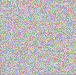

In [4]:
img_rgba_binary = ie.encode_text_file(r'\\192.168.31.2\raid1_500G\Book\小说\H小说\test\【短篇】QQ小妹.txt', "palette_binary")

img_rgba_binary

In [3]:
text = id.decode_image_file(r'\\192.168.31.2\raid1_500G\Book\小说\H小说\test\新建文件夹\斗破苍穹(palette_binary).png', 'palette_binary')

Decoding img(palette-binary)::   0%|          | 0/5985362 [00:00<?, ?it/s]

Decoding img(palette-binary):: 100%|██████████| 5985362/5985362 [00:02<00:00, 2805351.42it/s]


Encoding text(palette-binary):: 100%|██████████| 280/280 [00:00<00:00, 279953.54it/s]


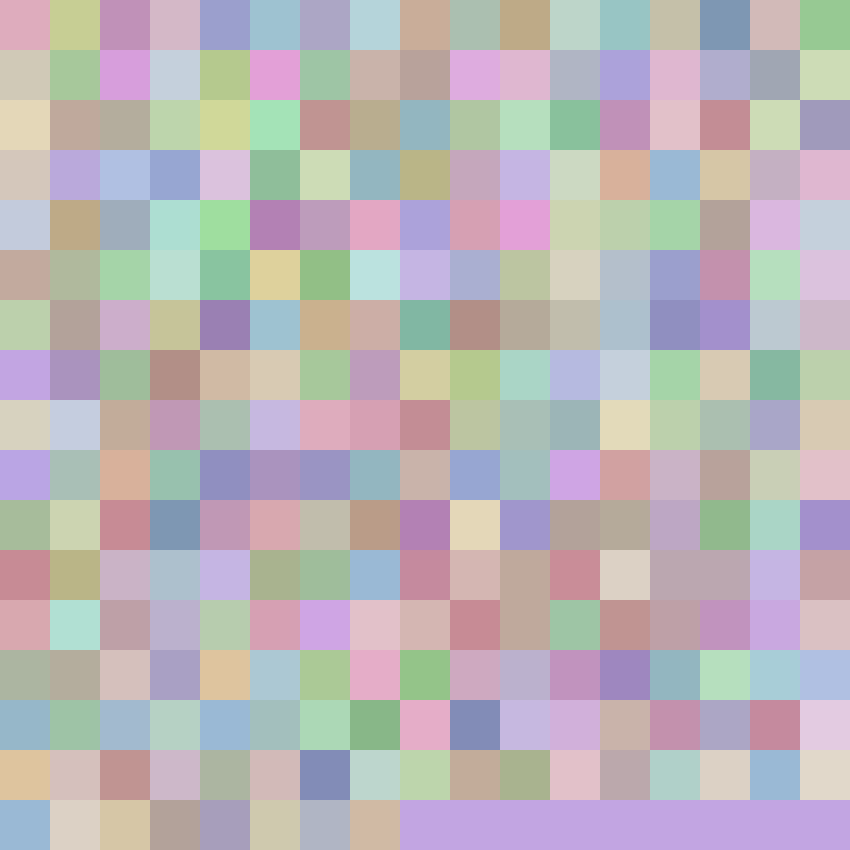

In [2]:
from tools.ImageProcessing import expand_image, restore_expanded_image, extract_pixels_as_gif

text = """import numpy as np
import matplotlib.pyplot as plt
from colorsys import rgb_to_hsv, hsv_to_rgb


def generate_morandi_colors(n=256, random_seed=0):
    colors = []
    np.random.seed(random_seed)
    
    for _ in range(n):
        # 随机生成低饱和度的颜色
        h = np.random.uniform(0, 1)  # 随机色调
        s = np.random.uniform(0.1, 0.3)  # 低饱和度
        v = np.random.uniform(0.7, 0.
display_colors(morandi_colors)"""

img = ie.encode_text(text, "palette_binary")
img_expand = expand_image(img, 50)
img_expand

Extract Pixels:: 100%|██████████| 289/289 [00:00<00:00, 11146.55it/s]


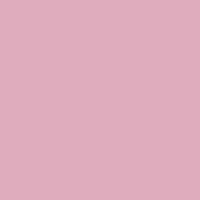

In [3]:
from IPython.display import display, Image as IPImage
gif_io = extract_pixels_as_gif(img)    

# 在Jupyter中显示GIF
gif_io.seek(0)  # 将指针移动到BytesIO的开始位置
display(IPImage(data=gif_io.read(), format='png'))

In [7]:
id.decode_image(img, "palette_binary")

Decoding img(palette-binary):: 100%|██████████| 289/289 [00:00<?, ?it/s]


'import numpy as np\nimport matplotlib.pyplot as plt\nfrom colorsys import rgb_to_hsv, hsv_to_rgb\n\n\ndef generate_morandi_colors(n=256, random_seed=0):\n    colors = []\n    np.random.seed(random_seed)\n    \n    for _ in range(n):\n        # 随机生成低饱和度的颜色\n        h = np.random.uniform(0, 1)  # 随机色调\n        s = np.random.uniform(0.1, 0.3)  # 低饱和度\n        v = np.random.uniform(0.7, 0.\ndisplay_colors(morandi_colors)'

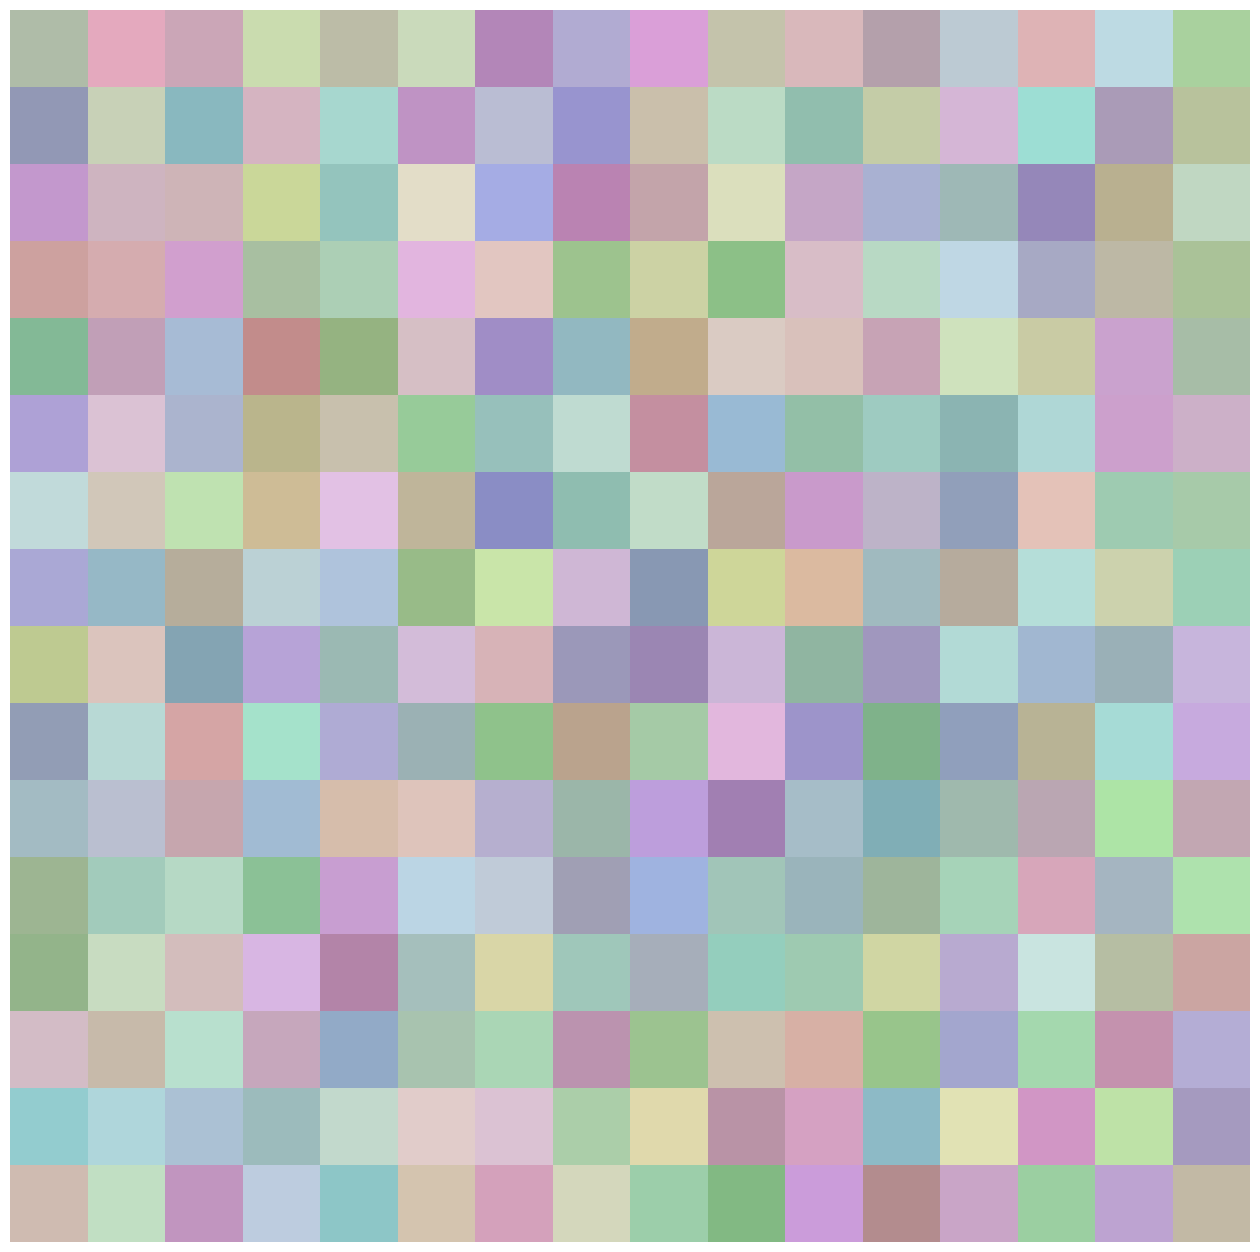

In [1]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.ImageProcessing import generate_palette_random, display_palette

# 生成256种莫兰迪色系颜色并展示
morandi_palette = generate_palette_random(256, 9)
display_palette(morandi_palette, 1)


In [8]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.TextTools import combine_txt_files


combine_txt_files(r'Y:\Book\小说\H小说\系列整理_re\秦青的幸福生活')


100%|██████████| 9/9 [00:00<00:00, 115.89it/s]

All files have been combined into Y:\Book\小说\H小说\系列整理_re\秦青的幸福生活\秦青的幸福生活.txt
